In [1]:
import pandas as pd
data=pd.read_csv('china_gdp.csv')
print(data)

    Year         Value
0   1960  5.918412e+10
1   1961  4.955705e+10
2   1962  4.668518e+10
3   1963  5.009730e+10
4   1964  5.906225e+10
5   1965  6.970915e+10
6   1966  7.587943e+10
7   1967  7.205703e+10
8   1968  6.999350e+10
9   1969  7.871882e+10
10  1970  9.150621e+10
11  1971  9.856202e+10
12  1972  1.121598e+11
13  1973  1.367699e+11
14  1974  1.422547e+11
15  1975  1.611625e+11
16  1976  1.516277e+11
17  1977  1.723490e+11
18  1978  1.483821e+11
19  1979  1.768565e+11
20  1980  1.896500e+11
21  1981  1.943690e+11
22  1982  2.035496e+11
23  1983  2.289502e+11
24  1984  2.580821e+11
25  1985  3.074796e+11
26  1986  2.988058e+11
27  1987  2.713498e+11
28  1988  3.107222e+11
29  1989  3.459575e+11
30  1990  3.589732e+11
31  1991  3.814547e+11
32  1992  4.249341e+11
33  1993  4.428746e+11
34  1994  5.622611e+11
35  1995  7.320320e+11
36  1996  8.608441e+11
37  1997  9.581594e+11
38  1998  1.025277e+12
39  1999  1.089447e+12
40  2000  1.205261e+12
41  2001  1.332235e+12
42  2002  1

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

data=pd.read_csv('china_gdp.csv')

x_data=data['Year']
y_data=data['Value']

def logistic(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))
p0 = [max(y_data), 0.03, 1990]

params, _ = curve_fit(logistic, x_data, y_data, p0)
a, b, c = params
print(f"Fitted parameters: a={a:.2f}, b={b:.4f}, c={c:.2f}")

Fitted parameters: a=49990186672210.75, b=0.1752, c=2021.37


In [5]:
y_pred = logistic(x_data, a, b, c)
r2 = r2_score(y_data, y_pred)
print(f"R2 score: {r2:.4f}")

R2 score: 0.9938


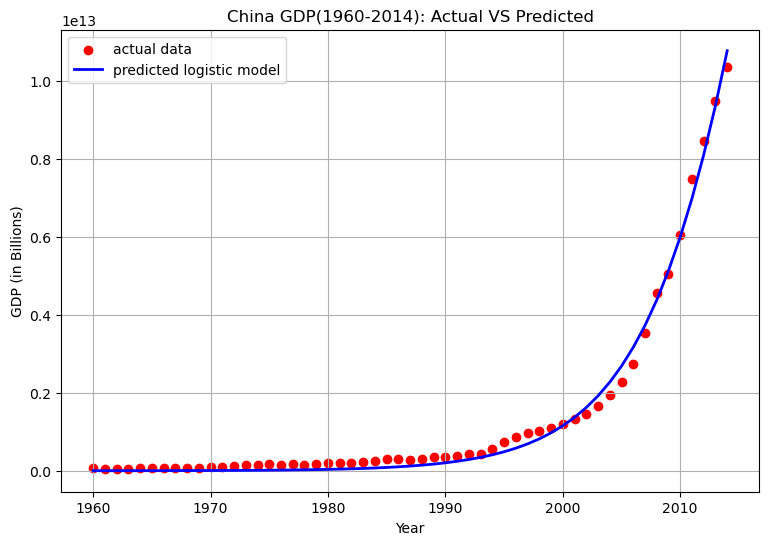

In [7]:
plt.figure(figsize=(9,6))
plt.scatter(x_data,y_data, color='red', label="actual data")
plt.plot(x_data,y_pred, color='blue', linewidth=2, label="predicted logistic model")
plt.title("China GDP(1960-2014): Actual VS Predicted")
plt.xlabel("Year")
plt.ylabel("GDP (in Billions)")
plt.legend()
plt.grid(True)
plt.show() 

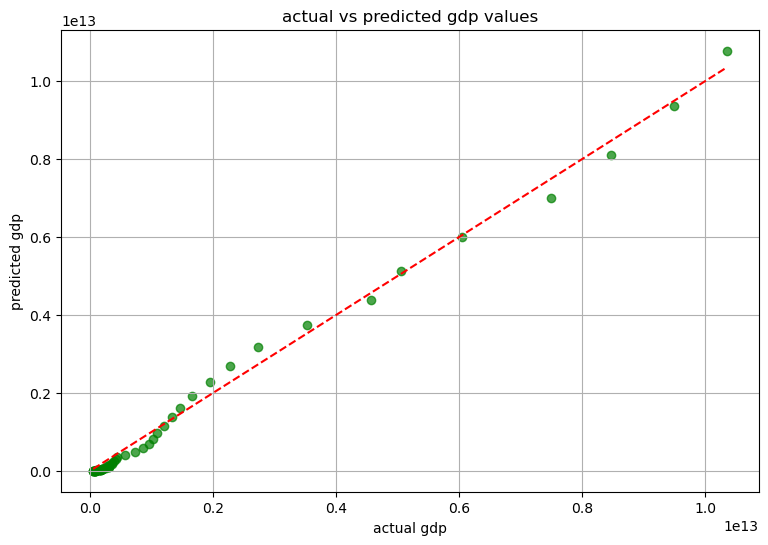

In [9]:
plt.figure(figsize=(9,6))
plt.scatter(y_data, y_pred, color='green', alpha=0.7)
plt.plot([y_data.min(),y_data.max()], [y_data.min(), y_data.max()], 'r--')
plt.title("actual vs predicted gdp values")
plt.xlabel("actual gdp")
plt.ylabel("predicted gdp")
plt.grid(True)
plt.show()